<a href="https://colab.research.google.com/github/MohsinAli08000/Titanic-DataSet-/blob/main/Titanic_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as anp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.shape

(891, 12)

In [9]:
# there is cabin is also empty so i am droping cabin because its 80% data is missing
df.drop('Cabin', axis=1, inplace=True)


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
# filling the mean value of Age dataset
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [18]:
# Handle missing values for Embarked by filling with the mode most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


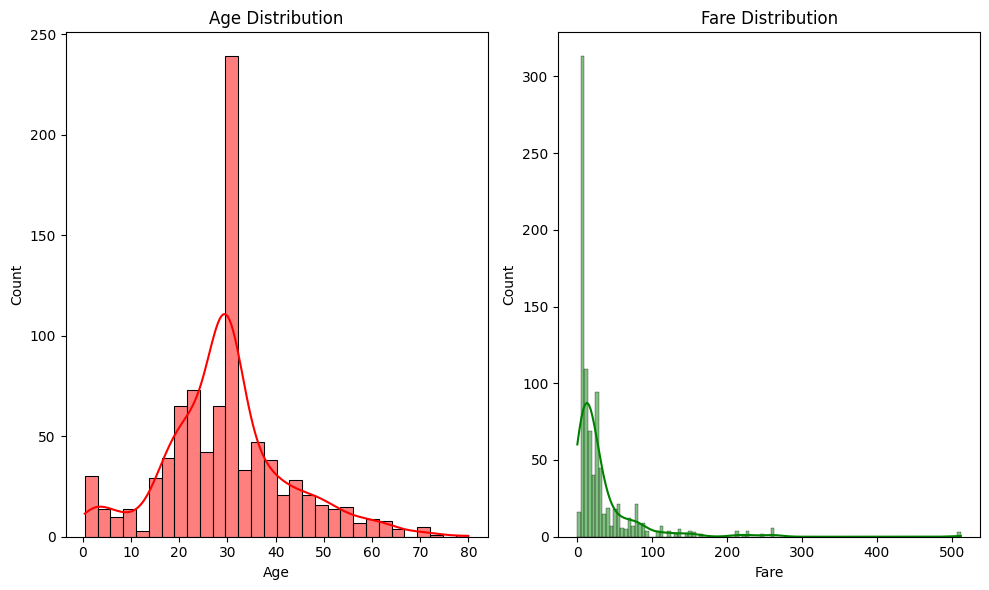

In [21]:
#Visualize the distribution of numeric data
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True,color='red')
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.histplot(df['Fare'], kde=True,color='green')
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()



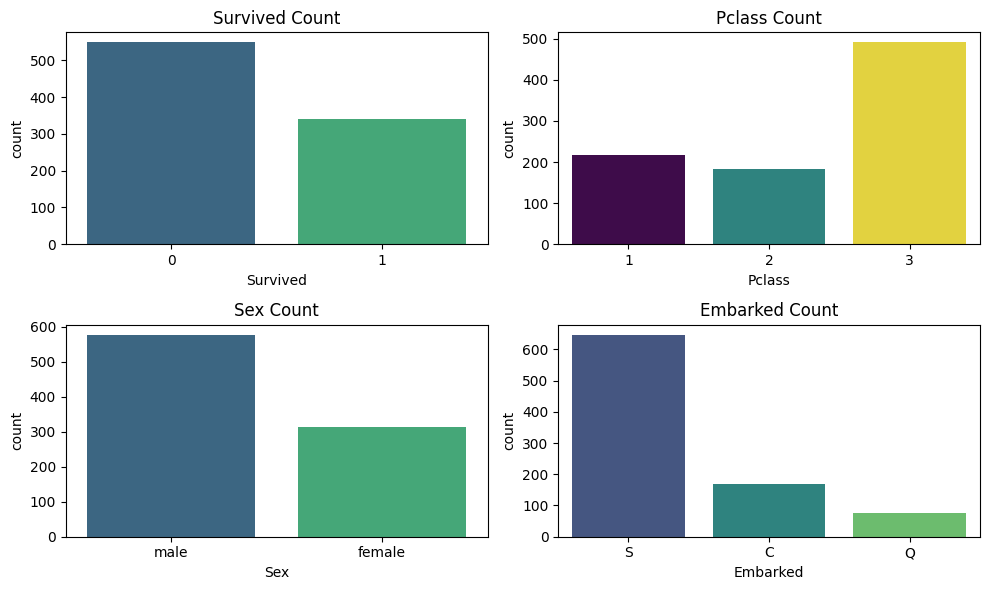

In [33]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=df, hue='Survived', palette='viridis', legend=False)
plt.title('Survived Count')
plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', data=df, hue='Pclass', palette='viridis', legend=False)
plt.title('Pclass Count')
plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=df, hue='Sex', palette='viridis', legend=False)
plt.title('Sex Count')
plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=df, hue='Embarked', palette='viridis', legend=False)
plt.title('Embarked Count')
plt.tight_layout()
plt.show()

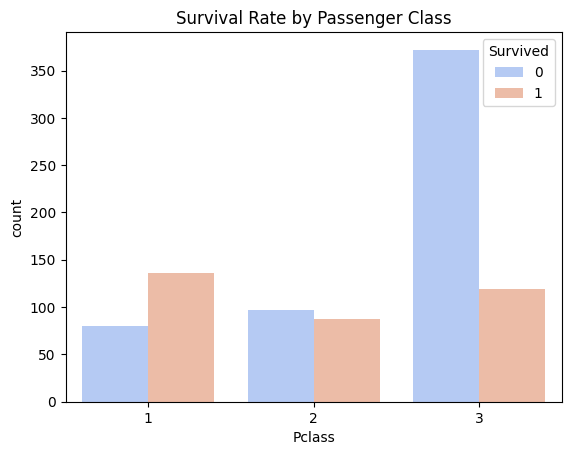

In [35]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.show()


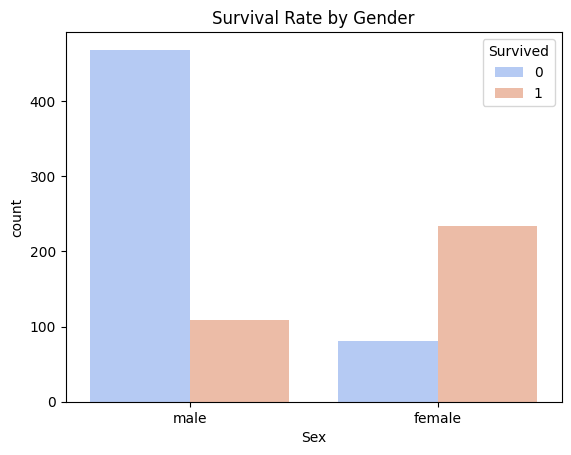

In [36]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()


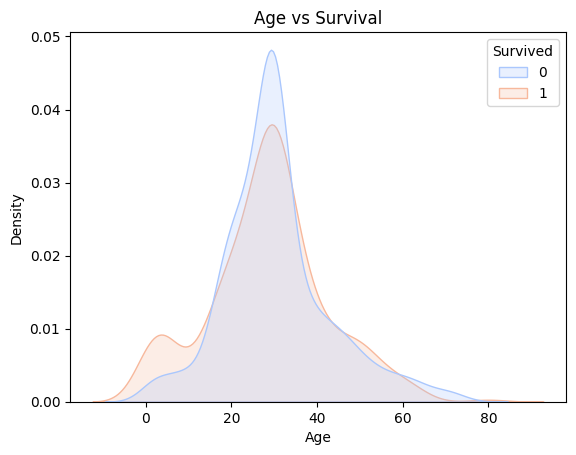

In [37]:
sns.kdeplot(data=df, x='Age', hue='Survived', common_norm=False, fill=True, palette='coolwarm')
plt.title('Age vs Survival')
plt.show()


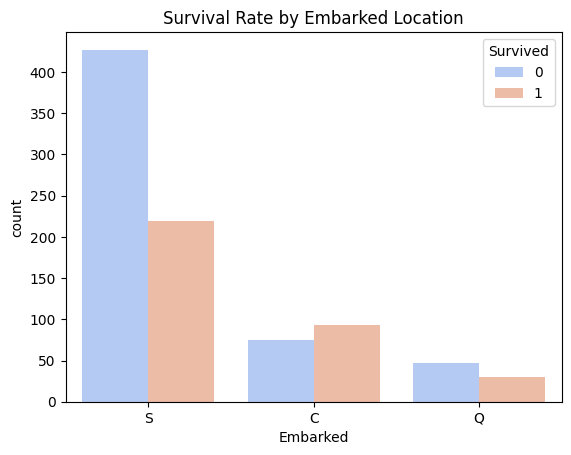

In [38]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Embarked Location')
plt.show()


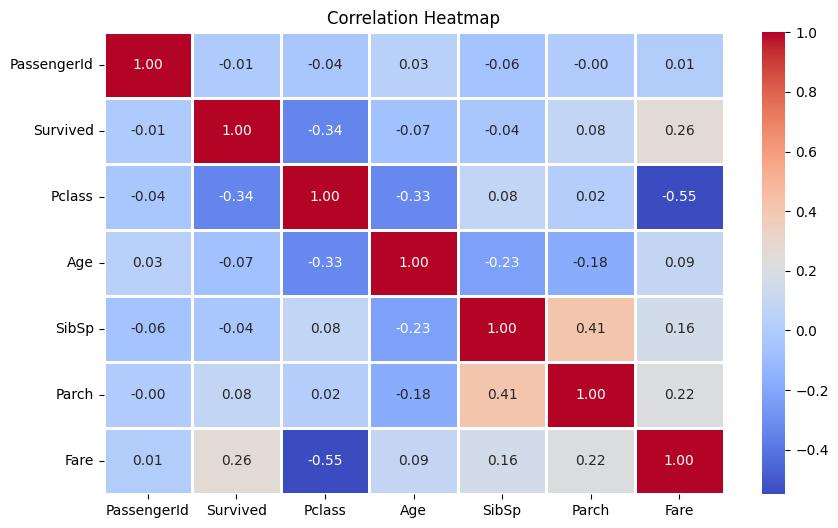

In [41]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
df['familySize'] = df['SibSp'] + df['Parch'] + 1
df['Is_alone'] = 1
df.loc[df['familySize'] > 1, 'Is_alone'] = 0
print(df[['familySize', 'Is_alone']].head())

   familySize  Is_alone
0           2         0
1           2         0
2           1         1
3           2         0
4           1         1
